In [ ]:
pip install nltk

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dropout, GlobalMaxPooling1D, Dense
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
import random
import seaborn as sns
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from wordcloud import WordCloud

2024-02-26 09:40:57.597977: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 09:40:57.598065: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 09:40:57.759977: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Loading the training dataset
df = pd.read_csv('/kaggle/input/llm-train/train (1).csv')

In [4]:
df

,text,generated
0,## The Advantages of Limiting Car Usage\n\nIn ...,1
1,"The United States is a car-dependent nation, w...",1
2,"In recent years, there has been a growing move...",1
3,"In recent years, there has been a growing move...",1
4,"In the past few decades, the United States has...",1
...,...,...
517184,The whole purpose of democracy is to create a ...,0
517185,I firmly believe that governments worldwide sh...,1
517186,I DFN't agree with this decision because a LFT...,0
517187,"Richard Non, Jimmy Carter, and Bob Dole and ot...",0


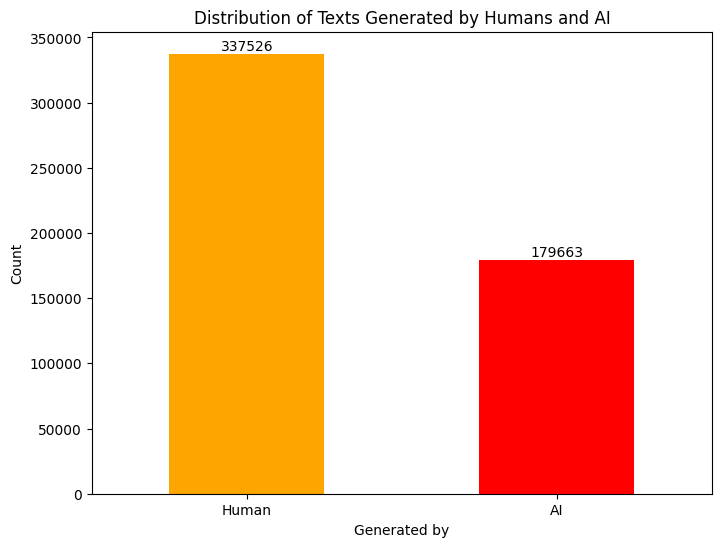

In [5]:
counts = df['generated'].value_counts()
# Plotting the counts
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color=['orange', 'red'])
plt.title('Distribution of Texts Generated by Humans and AI')
plt.xlabel('Generated by')
plt.ylabel('Count')
plt.xticks([0, 1], ['Human', 'AI'], rotation=0)
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


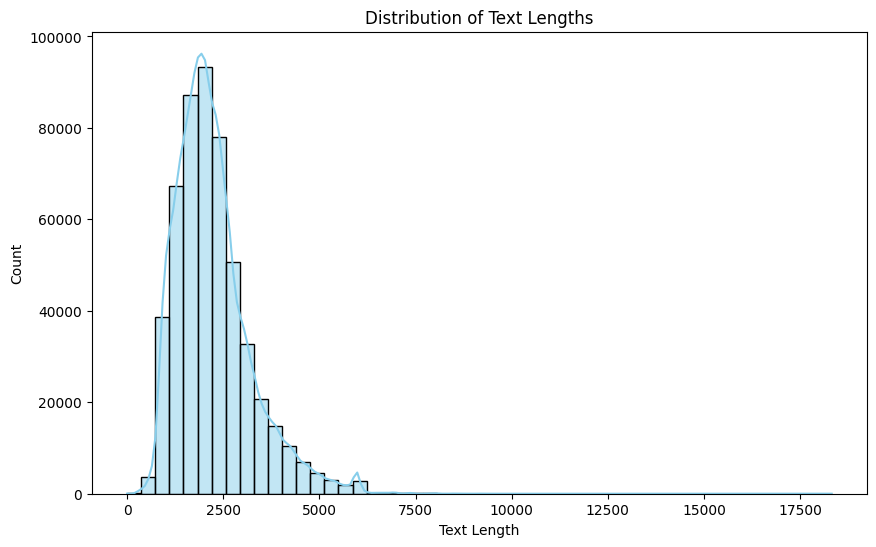

In [6]:
# Text Length Analysis
# Calculate the length of each text
df['text_length'] = df['text'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

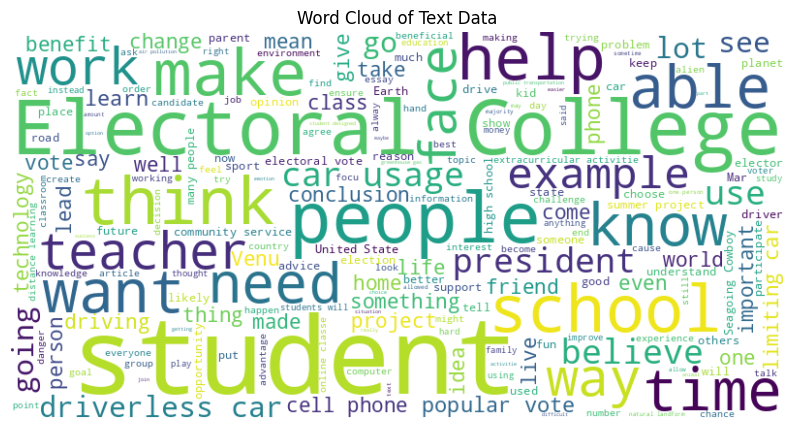

In [8]:
# Combine all text data into a single string
all_text = ' '.join(df['text'])
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()

In [9]:
df.isna().sum()

text           0
generated      0
text_length    0
dtype: int64

In [10]:
df.duplicated().sum()

124518

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop(517186, inplace=True)

In [14]:
df

,text,generated,text_length
0,## The Advantages of Limiting Car Usage\n\nIn ...,1,2830
1,"The United States is a car-dependent nation, w...",1,2669
2,"In recent years, there has been a growing move...",1,2415
3,"In recent years, there has been a growing move...",1,2691
4,"In the past few decades, the United States has...",1,2280
...,...,...,...
517183,Tie Face on Mars is really just a big misunder...,0,968
517184,The whole purpose of democracy is to create a ...,0,2319
517185,I firmly believe that governments worldwide sh...,1,2392
517187,"Richard Non, Jimmy Carter, and Bob Dole and ot...",0,1997


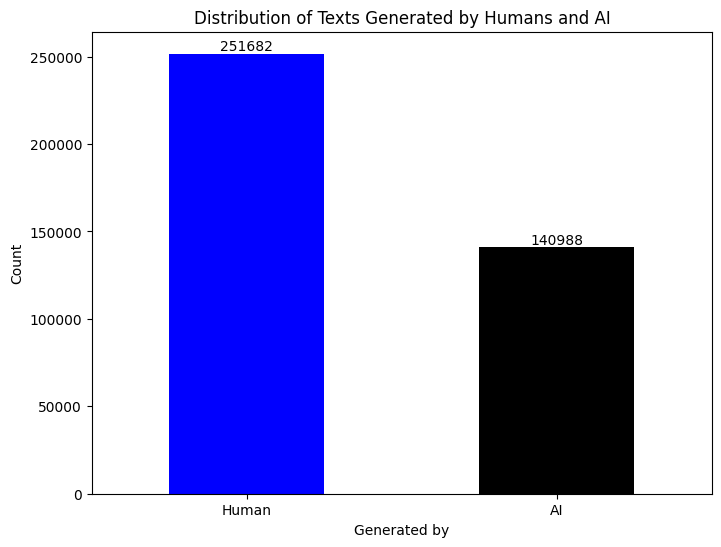

In [16]:
counts = df['generated'].value_counts()
# Plotting the counts
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color=['blue', 'black'])
plt.title('Distribution of Texts Generated by Humans and AI')
plt.xlabel('Generated by')
plt.ylabel('Count')
plt.xticks([0, 1], ['Human', 'AI'], rotation=0)
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [17]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [18]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [19]:
df['text'] = df['text'].apply(lambda x: x.lower())

In [20]:
# Remove special characters, punctuation, and symbols from each text in the Series
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [21]:
# Get English stopwords
stop_words = set(stopwords.words('english'))
# Remove stopwords from each text in the Series
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [23]:
df.duplicated().sum()

12200

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.duplicated().sum()

0

In [26]:
df.isna().sum()

text           0
generated      0
text_length    0
dtype: int64

In [27]:
df.head()

,text,generated,text_length
0,advantages limiting car usage recent years gro...,1,2830
1,united states cardependent nation twothirds tr...,1,2669
2,recent years growing movement limit car usage ...,1,2415
3,recent years growing movement limit car usage ...,1,2691
4,past decades united states become increasingly...,1,2280


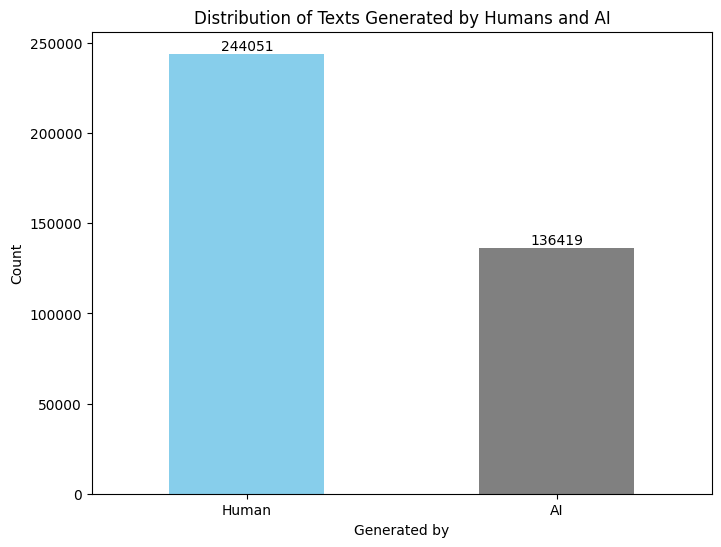

In [28]:
counts = df['generated'].value_counts()
# Plotting the counts
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color=['skyblue', 'gray'])
plt.title('Distribution of Texts Generated by Humans and AI')
plt.xlabel('Generated by')
plt.ylabel('Count')
plt.xticks([0, 1], ['Human', 'AI'], rotation=0)
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [29]:
# Separate the dataset based on the class label
class_0 = df[df['generated'] == 0]
class_1 = df[df['generated'] == 1]

In [30]:
# Determine which class has fewer samples
min_samples = min(len(class_0), len(class_1))

In [31]:
min_samples

136419

In [32]:
# Randomly sample from each class to match the desired number of samples
class_0_sampled = class_0.sample(n=min_samples, random_state=42)
class_1_sampled = class_1.sample(n=min_samples, random_state=42)

In [33]:
# Combine the equal-sized subsets into a balanced dataset
balanced_df = pd.concat([class_0_sampled, class_1_sampled])

# Shuffle the rows of the balanced dataset
df1 = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [34]:
df1

,text,generated,text_length
0,dear teachername people dontg understand ig is...,0,1444
1,animals used scientific research fair feelings...,1,1217
2,dear state senator writing express opinion ok ...,1,1815
3,dear senator presidential election iz one impo...,0,3715
4,often said one accomplish always something pro...,1,640
...,...,...,...
272833,got mrs realized looked like x human face want...,0,1079
272834,name address city state zip code email address...,1,4239
272835,deal memes senatoe believe consider voting ele...,0,3148
272836,todayj world success ij term ij often associat...,1,2400


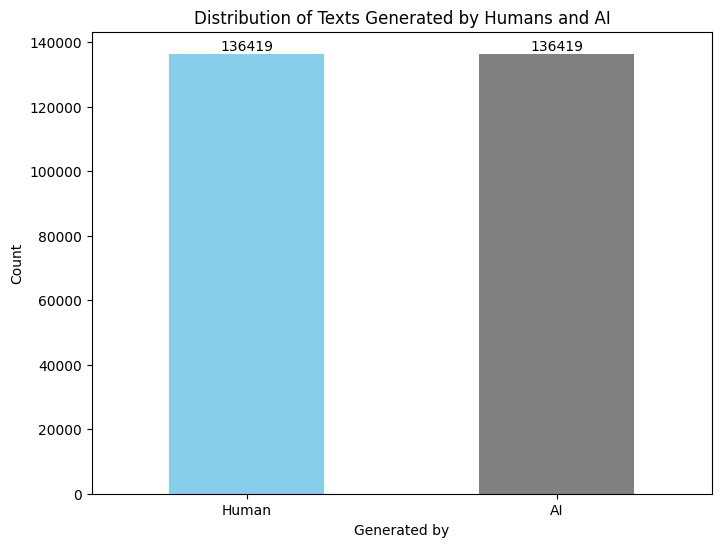

In [35]:
counts = df1['generated'].value_counts()
# Plotting the counts
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color=['skyblue', 'gray'])
plt.title('Distribution of Texts Generated by Humans and AI')
plt.xlabel('Generated by')
plt.ylabel('Count')
plt.xticks([0, 1], ['Human', 'AI'], rotation=0)
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [36]:
# Convert text and generated columns to lists
texts = df1['text'].tolist()
generated = df1['generated'].tolist()

In [37]:
text = df1['text'] 

In [38]:
# Convert all elements to strings
texts = [str(text) for text in texts]

# Tokenize the concatenated text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

In [39]:
# Convert text to sequences
text_sequences = tokenizer.texts_to_sequences(text)
# Convert generated to a list of lists
generated_sequences = [[value] for value in generated]

In [40]:
# Pad sequences to ensure uniform length
max_length = 200
X_text = pad_sequences(text_sequences, maxlen=max_length)
X_generated = pad_sequences(generated_sequences, maxlen=max_length)

In [41]:
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_text, generated, test_size=0.2, random_state=42)

In [42]:
# Build the model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.2),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          20757700  
                                                                 
 bidirectional (Bidirection  (None, 200, 128)          84480     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 200, 128)          0         
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [43]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10


I0000 00:00:1708941585.363612     245 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1365/1365 [==============================] - 119s 82ms/step - loss: 0.1333 - accuracy: 0.9497 - val_loss: 0.0375 - val_accuracy: 0.9914
Epoch 2/10
1365/1365 [==============================] - 47s 34ms/step - loss: 0.0206 - accuracy: 0.9946 - val_loss: 0.0179 - val_accuracy: 0.9957
Epoch 3/10
1365/1365 [==============================] - 39s 29ms/step - loss: 0.0099 - accuracy: 0.9979 - val_loss: 0.0132 - val_accuracy: 0.9964
Epoch 4/10
1365/1365 [==============================] - 38s 28ms/step - loss: 0.0071 - accuracy: 0.9985 - val_loss: 0.0110 - val_accuracy: 0.9968
Epoch 5/10
1365/1365 [==============================] - 38s 27ms/step - loss: 0.0053 - accuracy: 0.9989 - val_loss: 0.0100 - val_accuracy: 0.9975
Epoch 6/10
1365/1365 [==============================] - 37s 27ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0091 - val_accuracy: 0.9978
Epoch 7/10
1365/1365 [==============================] - 36s 27ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0084 - val_accur

In [ ]:
# Predict labels for the test set
y_pred = model.predict(X_val)
y_pred_binary = (y_pred > 0.5).astype(int)

In [ ]:
# Calculate accuracy score
accuracy = accuracy_score(y_val, y_pred_binary)
print(f'Accuracy Score: {accuracy}')

In [ ]:
# Generate classification report
print('Classification Report:')
print(classification_report(y_val, y_pred_binary))

In [ ]:
# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_val, y_pred)
print(f'AUC-ROC Score: {auc_roc}')

In [ ]:
# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC-ROC Score: {:.2f})'.format(auc_roc))  
plt.legend() 
plt.show()

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_binary)
print('Confusion Matrix:')
print(conf_matrix)

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
df3 = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/test_essays.csv')

In [ ]:
df3

In [ ]:
df3.isna().sum()

In [ ]:
df3.duplicated().sum()

In [ ]:
# Preprocess the text data in df3['text']
df3['text'] = df3['text'].apply(lambda x: x.lower())
df3['text'] = df3['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
df3['text'] = df3['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Tokenize the preprocessed text data
text_sequences_test = tokenizer.texts_to_sequences(df3['text'])

# Pad sequences to ensure uniform length
X_text_test = pad_sequences(text_sequences_test, maxlen=max_length)

# Predict labels for the preprocessed and tokenized test data
y_pred_test = model.predict(X_text_test)

# Convert predicted probabilities to binary labels
y_pred_binary_test = (y_pred_test > 0.5).astype(int)

In [ ]:
# Add the predicted labels to the test dataframe
df3['generated'] = y_pred_test.flatten()

# Select only the 'id' and 'generated' columns
submission_df = df3[['id', 'generated']]

# Save the test dataframe with predicted labels to a CSV file
submission_df.to_csv('submission.csv', index=False)

In [ ]:
submission_df